# Initialization


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from soliket import BinnedClusterLikelihood
from cobaya.model import get_model
import camb
%pylab inline

path2data = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/'

rad_in_deg2 = (np.deg2rad(1.))**2.


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
params = {
    'cosmomc_theta': 0.0104135,
    'ns': 0.965,
    'ombh2': 0.0226576,      
    'omch2': 0.1206864, 
    'As': 2.022662e-9,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'tau': 0.055,
    'mnu': 0.0,
    'nnu': 3.046,
    'omnuh2': 0.,
    'w': -1,
    
    'C0': 0. # not used

}

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(cosmomc_theta=params['cosmomc_theta'], ombh2=params['ombh2'], omch2=params['omch2'], mnu=0.0, omk=0, \
                   tau=params['tau'])
pars.InitPower.set_params(As=params['As'], ns=params['ns'], r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.], kmax=2.0)

#Linear spectra
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())
print(s8)

[0.81050087]


# CCL

In [13]:
params = {
    'h': 0.68,
    'n_s': 0.965,
    'Omega_b': 0.049,      
    'Omega_c': 0.26, 
    'sigma8': 0.81,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'm_nu': 0.0,
    'C0': 0. # doesnt matter

}


info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': True,
    'data': {
        'data_path': path2data,
        'cat_file': "DR5_cluster-catalog_v1.1.fits",
        'Q_file': "DR5ClusterSearch/selFn/QFit.fits",
        'tile_file': "DR5ClusterSearch/selFn/tileAreas.txt",
        'rms_file': "DR5ClusterSearch/selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "CCL",
        'massfunc_mode': 'ccl',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200m',
        'md_ym': '500c'
        
    },
    'YM': {
        'Mpivot': 3e14
    },
    'selfunc': {
        'SNRcut': 5.,
        'single_tile_test': "no",
        'mode': 'downsample',
        'dwnsmpl_bins': 5,
        'save_dwsmpld': True,
        'average_Q': False
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.8,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 1e13,
            'Mmax': 1e16,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'soliket.binned_clusters.CCL': 
               {'transfer_function': 'boltzmann_camb',
                'matter_pk': 'halofit',
                'baryons_pk': 'nobaryons',
                'md_hmf': '200m'}}
}


# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']

model.loglikes({})[0]

Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Downsampling selection function inputs.
Downsampling selection function inputs.
Downsampling selection function inputs.
Downsampling selection function inputs.
Downsampling selection function inputs.
Downsampling selection function inputs.
Considering full map.
Considering full map.
Considering full map.
Considering full map.
Considering full map.
Considering full map.
2D likelihood as a function of redshift and signal-to-noise.
2D likelihood as a function of redshift and signal-to-noise.
2D likelihood as a function of redshift and signal-to-noise.
2D likelihood as a function of redshift and signal-to-noise.
2D likelihood as a function of redshift and signal-to-noise.
2D likelihood as a function of redshift and signal-to-noise.
Reading data catalog.
Reading data catal

FileNotFoundError: [Errno 2] No such file or directory: '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/DR5ClusterSearch/selFn/QFitdwsmpld_nbins=5.npz'

In [19]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [20]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq_ccl = np.zeros(len(q))
catNq_ccl = np.zeros(len(q))
for i in range(len(q)):
    Nq_ccl[i] = Nzq[:,i].sum()    
    catNq_ccl[i] = catNzq[:,i].sum()

Number of clusters in redshift bin 0: 16.303307378357708.
Number of clusters in redshift bin 1: 185.69334638059377.
Number of clusters in redshift bin 2: 377.2698086785761.
Number of clusters in redshift bin 3: 461.92560059989324.
Number of clusters in redshift bin 4: 456.69961925650233.
Number of clusters in redshift bin 5: 400.6204366340885.
Number of clusters in redshift bin 6: 324.68890270260255.
Number of clusters in redshift bin 7: 248.29017045707664.
Number of clusters in redshift bin 8: 181.38969720479562.
Number of clusters in redshift bin 9: 127.63794377991516.
Number of clusters in redshift bin 10: 87.93476790242106.
Number of clusters in redshift bin 11: 58.42698980727753.
Number of clusters in redshift bin 12: 37.889190863000515.
Number of clusters in redshift bin 13: 24.04071065722499.
Number of clusters in redshift bin 14: 14.959734640642717.
Number of clusters in redshift bin 15: 9.150971216000467.
Number of clusters in redshift bin 16: 5.514839547543254.
Number of clus

0 1972.7053985219309
1 905.7938426095071
2 134.84336056755274
3 12.453464210859226
4 0.5595410799139389
5 0.008630840392881225
 Total predicted 2D N =  3026.364237830157


# CAMB

In [21]:
params = {
    'cosmomc_theta': 0.0104135,
    'ns': 0.965,
    'ombh2': 0.0226576,      
    'omch2': 0.1206864, 
    'As': 2.022662e-9,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'tau': 0.055,
    'mnu': 0.0,
    'nnu': 3.046,
    'omnuh2': 0.,
    'w': -1,
    
    'C0': 0.

}

path2data = path2data

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': False,
    'data': {
        'data_path': path2data,
        'cat_file': "DR5_cluster-catalog_v1.1.fits",
        'Q_file': "DR5ClusterSearch/selFn/QFit.fits",
        'tile_file': "DR5ClusterSearch/selFn/tileAreas.txt",
        'rms_file': "DR5ClusterSearch/selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "camb",
        'massfunc_mode': 'internal',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200m',
        'md_ym': '500c'
        
    },
    'YM': {
        'Mpivot': 3e14
    },
    'selfunc': {
        'SNRcut': 5.,
        'single_tile_test': "no",
        'mode': 'downsample',
        'dwnsmpl_bins': 5,
        'average_Q': False,
        'save_dwsmpld': True,
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.8,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 1e13,
            'Mmax': 1e16,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'camb': {'extra_args': {'num_massive_neutrinos': 0}}}
}


# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']

model.loglikes({})[0]

[camb] `camb` module loaded successfully from /usr/local/anaconda3/envs/cluster_counts_environment/lib/python3.8/site-packages/camb
 Nz for higher resolution =  114
0 1969.4836178639612
1 903.9938989097093
2 134.6145967257876
3 12.456824665917402
4 0.5626762633127557
5 0.008788031580048332
 Total predicted 2D N =  3021.120402460269
 ::: 2D ln likelihood =  347.343159240642


array([-347.34315924])

In [22]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [ ]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

In [30]:
Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
    Nq[i] = Nzq[:,i].sum()    
    catNq[i] = catNzq[:,i].sum()
Nz = np.zeros(len(z))
catNz = np.zeros(len(z))
for i in range(len(z)):
    Nz[i] = Nzq[i,:].sum()    
    catNz[i] = catNzq[i,:].sum()

In [28]:
color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

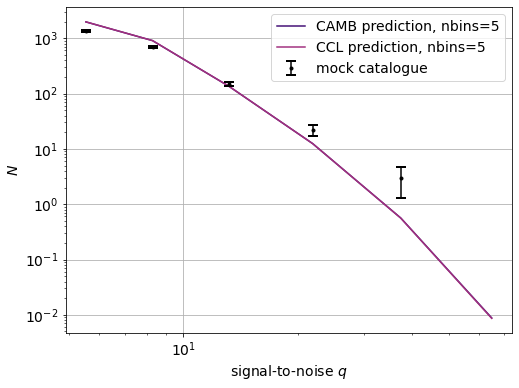

In [25]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[2], label='CAMB prediction, nbins=5')
plt.plot(q, Nq_ccl, color=color_list[6], label='CCL prediction, nbins=5')
plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

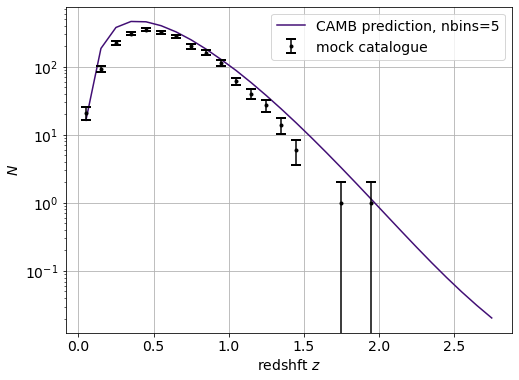

In [33]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[2], label='CAMB prediction, nbins=5')
# plt.plot(q, Nq_ccl, color=color_list[6], label='CCL prediction, nbins=5')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('redshft $z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('linear')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

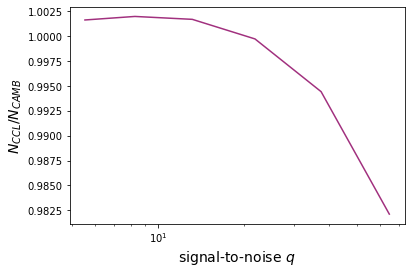

In [34]:
plt.semilogx(q, Nq_ccl/Nq, color=color_list[6])
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N_{CCL}/N_{CAMB}$', fontsize=14)
plt.show()

In [12]:

datafile_Q_dwsmpld = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/DR5ClusterSearch/selFn/QFitdwsmpld_nbins=5.npz'
Qfile = np.load(datafile_Q_dwsmpld)
allQ = Qfile['Q_dwsmpld']
tt500 = Qfile['tt500']

datafile_rms_dwsmpld = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/DR5ClusterSearch/selFn/RMSTabdwsmpld_nbins=5..npz'
rms = np.load(datafile_rms_dwsmpld)
noise = rms['noise']
skyfracs = rms['skyfracs']

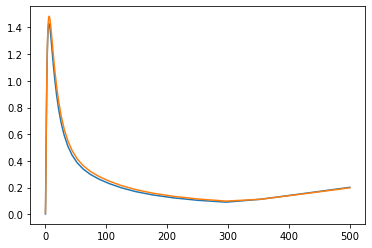

In [13]:
plt.plot(tt500,allQ[:,0])
plt.plot(tt500,allQ[:,1])
plt.show()

In [14]:
np.shape(tt500)
tt500.size

51

In [15]:
noise

array([9.13590715e-06, 1.32191117e-05, 1.73023162e-05, 2.13855207e-05,
       2.54687253e-05])

In [17]:
rad_in_deg2 = (np.deg2rad(1.))**2.
skyfracs/rad_in_deg2/41253.

array([0.0488115 , 0.09714411, 0.10777072, 0.06211241, 0.00441423])

## camb 1 bin

In [3]:
params = {
    'cosmomc_theta': 0.0104135,
    'ns': 0.965,
    'ombh2': 0.0226576,      
    'omch2': 0.1206864, 
    'As': 2.022662e-9,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'tau': 0.055,
    'mnu': 0.0,
    'nnu': 3.046,
    'omnuh2': 0.,
    'w': -1,
    
    'C0': 0.

}

path2data = path2data

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': False,
    'data': {
        'data_path': path2data,
        'cat_file': "DR5_cluster-catalog_v1.1.fits",
        'Q_file': "DR5ClusterSearch/selFn/QFit.fits",
        'tile_file': "DR5ClusterSearch/selFn/tileAreas.txt",
        'rms_file': "DR5ClusterSearch/selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "camb",
        'massfunc_mode': 'internal',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200m',
        'md_ym': '500c'
        
    },
    'YM': {
        'Mpivot': 3e14
    },
    'selfunc': {
        'SNRcut': 5.,
        'single_tile_test': "no",
        'mode': 'downsample',
        'dwnsmpl_bins': 1,
        'average_Q': False,
        'save_dwsmpld': True,
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.8,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 1e13,
            'Mmax': 1e16,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'camb': {'extra_args': {'num_massive_neutrinos': 0}}}
}


# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']

model.loglikes({})[0]

[camb] `camb` module loaded successfully from /usr/local/anaconda3/envs/cluster_counts_environment/lib/python3.8/site-packages/camb
 Nz for higher resolution =  114
0 3094.2479956595776
1 1500.4769928384837
2 237.94128834905987
3 22.510563461061498
4 0.9402943892117153
5 0.011307885556755673
 Total predicted 2D N =  4856.128442582952
 ::: 2D ln likelihood =  4856.128442582951


array([-4856.12844258])

In [4]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [5]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

0 3094.2479956595776
1 1500.4769928384837
2 237.94128834905987
3 22.510563461061498
4 0.9402943892117153
5 0.011307885556755673
 Total predicted 2D N =  4856.128442582952


In [6]:
Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
    Nq[i] = Nzq[:,i].sum()    
    catNq[i] = catNzq[:,i].sum()
Nz = np.zeros(len(z))
catNz = np.zeros(len(z))
for i in range(len(z)):
    Nz[i] = Nzq[i,:].sum()    
    catNz[i] = catNzq[i,:].sum()

In [7]:
color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

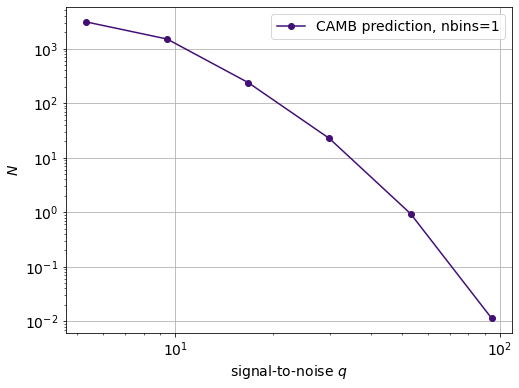

In [8]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[2], label='CAMB prediction, nbins=1',
         marker = 'o')
# plt.plot(q, Nq_ccl, color=color_list[6], label='CCL prediction, nbins=5')
# plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', 
#              ms=3, capsize=5, capthick=2, ls='none', 
#              label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [9]:
catNq

array([0., 0., 0., 0., 0., 0.])

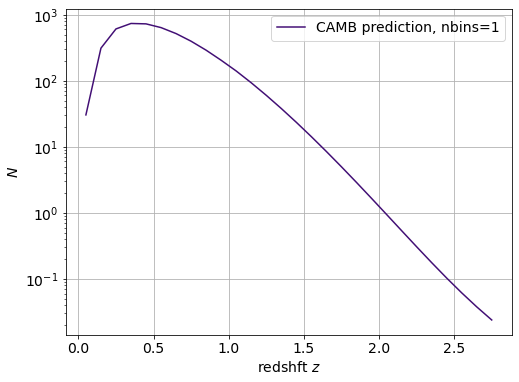

In [10]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[2], label='CAMB prediction, nbins=1')
# plt.plot(q, Nq_ccl, color=color_list[6], label='CCL prediction, nbins=5')
# plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('redshft $z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('linear')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [9]:

datafile_Q_dwsmpld = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/DR5ClusterSearch/selFn/QFitdwsmpld_nbins=1.npz'
Qfile = np.load(datafile_Q_dwsmpld)
allQ = Qfile['Q_dwsmpld']
tt500 = Qfile['tt500']

datafile_rms_dwsmpld = '/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/advact/DR5ClusterSearch/selFn/RMSTabdwsmpld_nbins=1..npz'
rms = np.load(datafile_rms_dwsmpld)
noise = rms['noise']
skyfracs = rms['skyfracs']

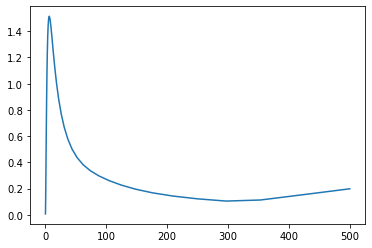

In [11]:
plt.plot(tt500,allQ[:,0])
# plt.plot(tt500,allQ[:,1])
plt.show()

# CLASS SZ

In [28]:
path_to_save = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/'

In [12]:

# np.savetxt(path_to_catalogue+'so_3freqs_191121_theta500arcmin_Q.txt',np.c_[tt500,Q])
path_to_save = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/'
np.savetxt(path_to_save+'advact_dr5_skyfracs_300621_1bins.txt',np.c_[skyfracs/rad_in_deg2/41253.])

In [13]:
so_skyfracs = np.loadtxt(path_to_save+'advact_dr5_skyfracs_300621_1bins.txt')
so_ylims = []
for index_thetas in range(tt500.size):
    for id_patches in range(so_skyfracs.size):
        so_ylims.append(noise[id_patches]/allQ[index_thetas,id_patches])
so_ylims = np.asarray(so_ylims)
np.savetxt(path_to_save+'advact_dr5_ylims_300621_1bins.txt',np.c_[so_ylims])
np.savetxt(path_to_save+'advact_dr5_thetas_300621_1bins.txt',np.c_[tt500])

In [29]:
so_skyfracs = np.loadtxt(path_to_save+'advact_dr5_skyfracs_300621_1bins.txt')

In [30]:
so_skyfracs

array(0.32025297)

In [34]:
13211.395702126198/(41253.)

0.3202529683205148

In [3]:
class_sz_params = {
'output' : 'sz_cluster_counts',
'mass function'  : 'M500',
'concentration parameter' : 'B13',
'has_selection_function' : 1,
'experiment' : 1.,
#'sky_area_deg2' : 599.353 # not used when completeness demanded
'y_m_relation' : 1,
'use_planck_binned_proba' : 0, #use diff of erfs
'class_sz_verbose'  : 0,

'M_min' : 1e12,
'M_max' : 1e16,
    


'N_ur' : 2.0328,
'N_ncdm' : 1,
'm_ncdm' : 0.0,
'T_ncdm' : 0.71611,

'non linear' : 'halofit',


# scaling law parameter
# Hilton et al 2020
'A_ym'  : 4.35e-5,
'B_ym'  : 0.08,
'm_pivot_ym [Msun]' : 3e14,




'bin_z_min_cluster_counts'  : 0.0001,
'bin_z_max_cluster_counts'  : 2.8,
'bin_dz_cluster_counts'  : 0.1,
    
'bin_dlog10_snr' : 0.25,
'log10_snr_min' : 0.6,
'log10_snr_max' : 2.,    
    
    
# 'dlny' : 0.03,
# 'lnymin' : -11.,
# 'lnymax' : -5.,
#sigmaM_ym = 0.075
'sigmaM_ym' : 0.,
'dlnM_cluster_count_completeness_grid' : 0.07,


'cluster_count_completeness_grid_z_cutoff_low' : 0.5,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.5,
'dz_cluster_count_completeness_grid_low_z' : 5e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-3,
'dz_cluster_count_completeness_grid_high_z' : 1e-3,

'mass_epsrel_cluster_counts' : 1e-5,
'mass_epsabs_cluster_counts' : 1e-50,

'redshift_epsrel_cluster_counts' : 1e-3,
'redshift_epsabs_cluster_counts' : 1e-30,



'signal-to-noise cut-off for survey cluster completeness' : 5,

# 'h' :0.7,
# 'Omega_b' :0.04,
# 'Omega_cdm' :0.26,
# #sigma8=0.8
# 'ln10^{10}A_s'  : 3.1,
# 'n_s' : 0.95,

'100*theta_s': 1.04135,
'n_s': 0.965,
'omega_b': 0.0226576,      
'omega_cdm': 0.1206864, 
'A_s': 2.022662e-9,    
    
# X ray mass bias (if applicable)
'B' : 1.,




# tabulation of mass function:
'n_z_dndlnM' : 100,
'n_m_dndlnM' : 100,

# computation of mass function
# (grid in mass and redshifts for sigma and dsigma)
'ndim_masses' : 100,
'ndim_redshifts' : 100,

# pk setup for computation of sigma and dsigma
'k_per_decade_class_sz' : 20.,
'k_min_for_pk_class_sz' : 1e-3,
'k_max_for_pk_class_sz' : 1e1,
'P_k_max_h/Mpc' : 1e1,

'SO_thetas_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/advact_dr5_thetas_300621_1bins.txt',
'SO_skyfracs_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/advact_dr5_skyfracs_300621_1bins.txt',
'SO_ylims_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/advact_dr5_ylims_300621_1bins.txt'
}


In [9]:
from classy_sz import Class
M = Class()
M.set(class_sz_params)
M.set({
# 'B_ym': 0.08,
# 'A_ym': 4.35e-5,
'C_ym' : 0.,
# 'sigmaM_ym' : 0.0,

# 'M_min' : 1e12,
'M_max' : 5e15,    
'z_min': 1e-5,
'z_max':3.,

'apply_relativistic_correction_to_y_m':0,
'signal-to-noise cut-off for survey cluster completeness' : 5.,
# 'use_websky_m200m_to_m200c_conversion': 1,

# 'dlny' : 0.001, #HW used to be 0.01, #step in y integral
# 'lnymin' : -11., #HW no impact
# 'lnymax' : 10., #HW no impact

'dlnM_cluster_count_completeness_grid' : 0.0005, #HW used to be 0.01, try bigger, big impact on speed


'cluster_count_completeness_grid_z_cutoff_low' : 0.5, #HW good value, #integrating over redshift, different regeims
'cluster_count_completeness_grid_z_cutoff_mid' : 1.5, #HW no change

'dz_cluster_count_completeness_grid_low_z' : 0.01, #HW used to be 0.001
'dz_cluster_count_completeness_grid_mid_z' : 0.01, #HW used to be 0.1
'dz_cluster_count_completeness_grid_high_z' : 0.01, #HW used to be 1e-1, #try taking bigger steps

'mass_epsrel_cluster_counts' : 1e-5, #leave as is
'mass_epsabs_cluster_counts' : 1e-50,

'redshift_epsrel_cluster_counts' : 1e-3, #leave as is
'redshift_epsabs_cluster_counts' : 1e-30,

# # tabulation of mass function:
'n_z_dndlnM' : 150, #HW previously 150
'n_m_dndlnM' : 200, #HW previously 150

# # computation of mass function
# # (grid in mass and redshifts for sigma and dsigma)
    #HW these are extremely high, try 80 or 100
'ndim_masses' : 250, #HW previoulsy 250, big impact on speed
'ndim_redshifts' : 80, #HW previously 250, big impact on speed

# pk setup for computation of sigma and dsigma
'k_per_decade_class_sz' : 100., #HW previously 20, last one I can change
'k_min_for_pk_class_sz' : 1e-3, #Don't change below this
'k_max_for_pk_class_sz' : 1e1,

'P_k_max_h/Mpc' : 1e1,
'non linear': 'halofit',

'm_pivot_ym [Msun]' : 3e14,   
})
M.compute()

In [10]:
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())

h : 0.677322
sigma8 : 0.809357
Omega_m : 0.312457
n_s : 0.965000


In [11]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
# dNdzdy_theoretical_with_rel = M_with_rel.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

In [12]:
N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
N_clusters_z_theory_with_rel = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz]))
#     N_clusters_z_theory_with_rel.append(np.sum(dNdzdy_theoretical_with_rel[iz]))
N_clusters_y_theory = []
N_clusters_y_theory_with_rel = []
for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
#     N_clusters_y_theory_with_rel.append(np.sum(np.asarray(dNdzdy_theoretical_with_rel)[:,iy]))



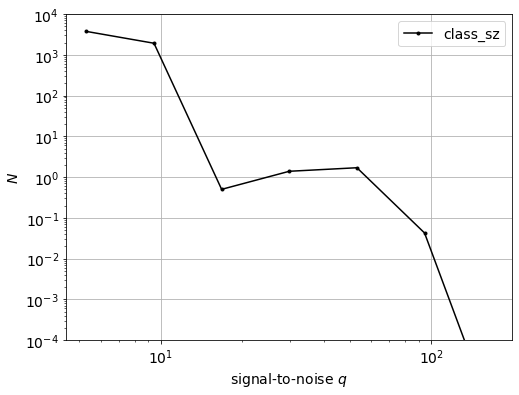

In [13]:
plt.figure(figsize=(8,6))
# plt.plot(q, Nq, color=color_list[2],marker='o', label='CAMB prediction, nbins=1')
# plt.plot(q, Nq_ccl, color=color_list[6], label='CCL prediction, nbins=5',marker='o')
# plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
# plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,
#              yerr=np.sqrt(N_clusters_y_theory),
#              marker='o',markersize=3.,ls='none',label='class_sz',capsize=9,c='orange')
plt.plot(10**np.asarray(log10y_center),N_clusters_y_theory,

             marker='o',markersize=3.,ls='-',label='class_sz',c='k')

plt.ylim(1e-4,1e4)
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

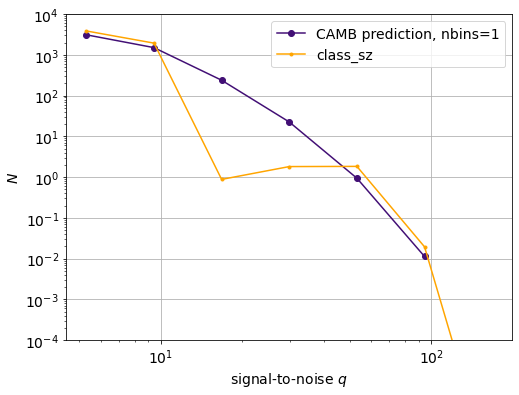

In [200]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[2],marker='o', label='CAMB prediction, nbins=1')
# plt.plot(q, Nq_ccl, color=color_list[6], label='CCL prediction, nbins=5',marker='o')
# plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
# plt.errorbar(10**np.asarray(log10y_center),N_clusters_y_theory,
#              yerr=np.sqrt(N_clusters_y_theory),
#              marker='o',markersize=3.,ls='none',label='class_sz',capsize=9,c='orange')
plt.plot(10**np.asarray(log10y_center),N_clusters_y_theory,

             marker='o',markersize=3.,ls='-',label='class_sz',c='orange')

plt.ylim(1e-4,1e4)
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

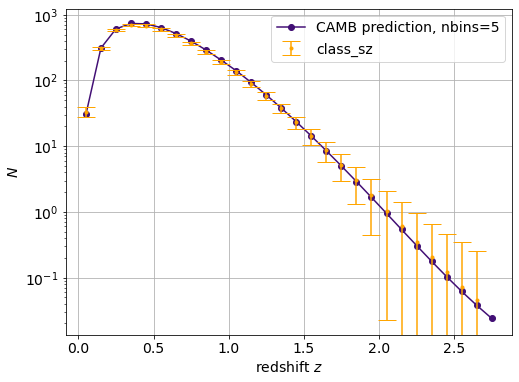

In [18]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[2], label='CAMB prediction, nbins=5',marker='o')
# plt.plot(z, Nq_ccl, color=color_list[6], label='CCL prediction, nbins=5',marker='o')
# plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),marker='o',markersize=3.,ls='none',label='class_sz',capsize=9,c='orange')


plt.xlabel('redshift $z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('linear')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [24]:
q

array([ 5.30884444,  7.07945784,  9.44060876, 12.58925412, 16.78804018,
       22.38721139])

In [23]:
10**np.asarray(log10y_center)

array([  5.30884444,   9.44060876,  16.78804018,  29.85382619,
        53.08844442,  94.40608763, 167.88040181])

In [52]:
log10y_center

[0.725, 0.975, 1.225, 1.475, 1.725, 1.975, 2.225]

# SNR binning in SOLikeT

In [26]:
# SNR binning (following szcounts.f90)
logqmin = 0.6#self.binning['q']['log10qmin']
logqmax = 2.#self.binning['q']['log10qmax']
dlogq = 0.25#self.binning['q']['dlog10q']

In [27]:
Nq = int((logqmax - logqmin)/dlogq) + 1
qbins = 10**np.arange(logqmin, logqmax+dlogq, dlogq)
qarr = 0.5*(qbins[:1] + qbins[1:])

In [50]:
qbins[:1]

array([3.98107171])

In [28]:
qarr

array([ 5.53026477,  8.28516291, 13.18414155, 21.89589438, 37.38782507,
       64.93680644])

In [29]:
np.log10(qarr)

array([0.74274592, 0.91830105, 1.12005186, 1.34036269, 1.5727302 ,
       1.81249093])

In [30]:
np.arange(logqmin, logqmax+dlogq, dlogq)

array([0.6 , 0.85, 1.1 , 1.35, 1.6 , 1.85, 2.1 ])

In [31]:
(0.6 + 0.85)/2.

0.725

In [32]:
qbins[:1]

array([3.98107171])

In [33]:
qbins[1:]

array([  7.07945784,  12.58925412,  22.38721139,  39.81071706,
        70.79457844, 125.89254118])

In [45]:
qbins_log = np.arange(logqmin, logqmax+dlogq, dlogq)
qarr_log = 10**(0.5*(qbins_log[:1] + qbins_log[1:]))

In [51]:
0.5*(qbins_log[:-1] + qbins_log[1:])

array([0.725, 0.975, 1.225, 1.475, 1.725, 1.975])

In [48]:
qbins_log[:1]

array([0.6])

In [49]:
qbins_log[1:]

array([0.85, 1.1 , 1.35, 1.6 , 1.85, 2.1 ])

In [46]:
np.log10(qarr_log)

array([0.725, 0.85 , 0.975, 1.1  , 1.225, 1.35 ])

In [36]:
qarr_log

array([ 5.30884444,  7.07945784,  9.44060876, 12.58925412, 16.78804018,
       22.38721139])

In [37]:
np.log10(5.)

0.6989700043360189

In [43]:
qbins_log 

array([0.6 , 0.85, 1.1 , 1.35, 1.6 , 1.85, 2.1 ])

In [44]:
np.log10(qbins)

array([0.6 , 0.85, 1.1 , 1.35, 1.6 , 1.85, 2.1 ])

In [170]:
cluster_settings = {

                   '100*theta_s':1.04135,
                   'omega_b':0.0226576,
                   'omega_cdm':0.1206864,
                   'A_s':2.022662e-9,
                   'tau_reio':0.055,
                   'n_s': 0.96605,

'output' : 'sz_cluster_counts',
'mass function' : 'T08',
'concentration parameter': 'B13',

'has_selection_function' : 1,
'experiment' : 1, # 1: simons observatory, 0: planck
'y_m_relation' : 1, # 1: Hasselfield et al, 0: Planck
    
# 'SO_thetas_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/so_3freqs_191121_thetas.txt',
# 'SO_skyfracs_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/so_3freqs_191121_skyfracs.txt',
# 'SO_ylims_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/so_3freqs_191121_ylims.txt',
# X ray mass bias (if applicable -  default 1)
# 'B' : 1.,
    
'signal-to-noise cut-off for survey cluster completeness' : 5,

# scaling law parameter

'B_ym': 0.08,
'A_ym': 4.35e-5,
'C_ym' : 0.,
'sigmaM_ym' : 0.0,

'M_min' : 1e12,
'M_max' : 1e16,


'YHe': 'BBN',

# 1 massive neutrino (planck 2018 baseline)
# neutrino mass set to 0
'N_ur': 2.0328,
'N_ncdm': 1,
'm_ncdm': 0.0,
'T_ncdm': 0.71611,


# #3 massive neutrinos
# N_ur : 0.00641
# N_ncdm : 1
# deg_ncdm : 3
# m_ncdm : 0.02
# T_ncdm : 0.71611




# Prescription for HMF to be used with massive neutrinos
# HMF_prescription_NCDM: 'CDM'


'bin_z_min_cluster_counts' : 1.e-3,
'bin_z_max_cluster_counts' : 2.,
'bin_dz_cluster_counts' : 0.1,
    
'bin_dlog10_snr': 0.25,
'log10_snr_min':0.6,
'log10_snr_max':2.0,

'dlny' : 0.01,
'lnymin' : -11.,
'lnymax' : 10.,

'dlnM_cluster_count_completeness_grid' : 0.01,


'cluster_count_completeness_grid_z_cutoff_low' : 0.5,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.5,

'dz_cluster_count_completeness_grid_low_z' : 5e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-1,
'dz_cluster_count_completeness_grid_high_z' : 1e-1,

'mass_epsrel_cluster_counts' : 1e-3,
'mass_epsabs_cluster_counts' : 1e-30,

'redshift_epsrel_cluster_counts' : 1e-3,
'redshift_epsabs_cluster_counts' : 1e-30,

# # tabulation of mass function:
'n_z_dndlnM' : 150,
'n_m_dndlnM' : 150,

# # computation of mass function
# # (grid in mass and redshifts for sigma and dsigma)
'ndim_masses' : 250,
'ndim_redshifts' : 250,

# pk setup for computation of sigma and dsigma
'k_per_decade_class_sz' : 20.,
'k_min_for_pk_class_sz' : 1e-3,
'k_max_for_pk_class_sz' : 1e1,

'P_k_max_h/Mpc' : 1e0,
'non linear': 'halofit',
'use_websky_m200m_to_m200c_conversion': 1

}

In [171]:
snrcut = 5
from classy_sz import Class
M = Class()
M.set(cluster_settings)
M.set({
'apply_relativistic_correction_to_y_m':0,
'signal-to-noise cut-off for survey cluster completeness' : snrcut,
'use_websky_m200m_to_m200c_conversion': 1,



'dlny' : 0.1, #HW used to be 0.01, #step in y integral
'lnymin' : -11., #HW no impact
'lnymax' : 10., #HW no impact

'dlnM_cluster_count_completeness_grid' : 0.07, #HW used to be 0.01, try bigger, big impact on speed


'cluster_count_completeness_grid_z_cutoff_low' : 0.5, #HW good value, #integrating over redshift, different regeims
'cluster_count_completeness_grid_z_cutoff_mid' : 1.5, #HW no change

'dz_cluster_count_completeness_grid_low_z' : 0.015, #HW used to be 0.001
'dz_cluster_count_completeness_grid_mid_z' : 0.12, #HW used to be 0.1
'dz_cluster_count_completeness_grid_high_z' : 0.2, #HW used to be 1e-1, #try taking bigger steps

'mass_epsrel_cluster_counts' : 1e-3, #leave as is
'mass_epsabs_cluster_counts' : 1e-30,

'redshift_epsrel_cluster_counts' : 1e-3, #leave as is
'redshift_epsabs_cluster_counts' : 1e-30,

# # tabulation of mass function:
'n_z_dndlnM' : 80, #HW previously 150
'n_m_dndlnM' : 50, #HW previously 150

# # computation of mass function
# # (grid in mass and redshifts for sigma and dsigma)
    #HW these are extremely high, try 80 or 100
'ndim_masses' : 100, #HW previoulsy 250, big impact on speed
'ndim_redshifts' : 80, #HW previously 250, big impact on speed

# pk setup for computation of sigma and dsigma
'k_per_decade_class_sz' : 18., #HW previously 20, last one I can change
'k_min_for_pk_class_sz' : 1e-3, #Don't change below this
'k_max_for_pk_class_sz' : 1e1,

'P_k_max_h/Mpc' : 1e0,
'non linear': 'halofit',

'm_pivot_ym [Msun]' : 3e14,
})
M.compute()
print('h : %f'%M.h())



h : 0.677322


In [172]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
# dNdzdy_theoretical_with_rel = M_with_rel.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']

In [173]:
N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
N_clusters_z_theory_with_rel = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz]))
#     N_clusters_z_theory_with_rel.append(np.sum(dNdzdy_theoretical_with_rel[iz]))
N_clusters_y_theory = []
N_clusters_y_theory_with_rel = []
for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
#     N_clusters_y_theory_with_rel.append(np.sum(np.asarray(dNdzdy_theoretical_with_rel)[:,iy]))



(1.0, 5000000.0)

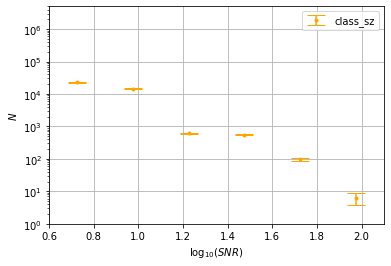

In [174]:
# N_clusters_y, xedges = np.histogram(np.log10(snr), bins=log10y_edges)
# plt.errorbar(log10y_center,N_clusters_y,yerr=np.sqrt(N_clusters_y),marker='o',markersize=3.,ls='none',label='mock catalogue',capsize=5,c='r')
# n, bins, patches = plt.hist(x=np.repeat(log10y_center,N_clusters_y_theory), bins=log10y_edges, color='orange',alpha=0.7, rwidth=0.95, label='class_sz')
plt.errorbar(log10y_center,N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),
             marker='o',markersize=3.,ls='none',label='class_sz',capsize=9,c='orange')
# plt.errorbar(log10y_center,N_clusters_y_theory_with_rel,yerr=np.sqrt(N_clusters_y_theory_with_rel),marker='o',markersize=3.,ls='none',label='class_sz (rel. corr.)',capsize=5,c='k')



# plt.errorbar(q, Nq, yerr=np.sqrt(Nq), color='blue', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='szcountsf90')

# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')



plt.grid()
plt.legend()
plt.xlabel(r'$\log_{10}(SNR)$')
plt.ylabel(r'$N$')
plt.yscale('log')
plt.xlim(0.6,2.1)
plt.ylim(1.,5e6)

In [66]:
N_clusters_z_theory

[3.3283193126259444e-294,
 2.073414304259742e-293,
 4.9742787734153015e-293,
 8.499753451053398e-293,
 1.22141554727535e-292,
 1.5789805084908586e-292,
 1.9001406255797604e-292,
 2.1698807091658075e-292,
 2.381659001485031e-292,
 2.533536884817794e-292,
 2.6269914273096945e-292,
 2.6664411962408955e-292,
 2.6577779672402837e-292,
 2.608101184060945e-292,
 2.5241737383295296e-292,
 2.4127840788667142e-292,
 2.2807113113929376e-292,
 2.1340282307269525e-292,
 1.9779728823821597e-292]